In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
def function(df,column_name,target_column):
    """
    inputs: dataframe, Categorical column
    outputs: Target column (Countinues value)
    
    Description:
    
    The function designed such way to calcualte the median of the any continues value and taking into consideration
    will replace the categorical value into ordinal categorical. Replace null value creating None Category for whole dataframe.
    
    Return:
    dictionary with replacebale value of categories.
    
    """
    
    df.fillna("None",inplace=True)
    temp={}
    unique_values=df[column_name].unique()
    for value in unique_values:
        median_value=df[df[column_name]==value][target_column].median()
        temp[value]=median_value
    
    
    temp=dict(sorted(temp.items(),key=lambda item: item[1]))
    
    result={}
    for index,key in enumerate(temp.keys()):
        result[key]=index
        
    return result

In [7]:
category_columns=df.select_dtypes(include=["category","object"]).columns.to_list()

In [8]:
numerical_columns=df.select_dtypes(exclude=["category","object"]).columns.to_list()

In [9]:
for column in category_columns:
    
    
    map_value=function(df,column,"SalePrice")
    df[column]=df[column].map(map_value)
    

In [10]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,0,1,1,...,0,0,4,2,0,2,2008,5,4,208500
1,2,20,3,80.0,9600,1,1,0,1,1,...,0,0,4,2,0,5,2007,5,4,181500
2,3,60,3,68.0,11250,1,1,1,1,1,...,0,0,4,2,0,9,2008,5,4,223500
3,4,70,3,60.0,9550,1,1,1,1,1,...,0,0,4,2,0,2,2006,5,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,...,0,0,4,2,0,12,2008,5,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,0,1,1,...,0,0,4,2,0,8,2007,5,4,175000
1456,1457,20,3,85.0,13175,1,1,0,1,1,...,0,0,1,2,0,2,2010,5,4,210000
1457,1458,70,3,66.0,9042,1,1,0,1,1,...,0,0,3,1,2500,5,2010,5,4,266500
1458,1459,20,3,68.0,9717,1,1,0,1,1,...,0,0,4,2,0,4,2010,5,4,142125


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   int64 
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   int64 
 6   Alley          1460 non-null   int64 
 7   LotShape       1460 non-null   int64 
 8   LandContour    1460 non-null   int64 
 9   Utilities      1460 non-null   int64 
 10  LotConfig      1460 non-null   int64 
 11  LandSlope      1460 non-null   int64 
 12  Neighborhood   1460 non-null   int64 
 13  Condition1     1460 non-null   int64 
 14  Condition2     1460 non-null   int64 
 15  BldgType       1460 non-null   int64 
 16  HouseStyle     1460 non-null   int64 
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [12]:
df[numerical_columns]=df[numerical_columns].replace("None",10)

In [13]:
from scipy import stats
#Null hypothesis: There is a same mean between both columns
for column in numerical_columns:
    t_statistic, p_value = stats.ttest_ind(df[column], df["SalePrice"])
    
    if (p_value<0.05):
        print(f"Null hypothesis rejected for column {column}\n")
    else:
        print(f"Null Hypothesis accepted for column {column}\n")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Null hypothesis rejected for column Id

Null hypothesis rejected for column MSSubClass

Null hypothesis rejected for column LotFrontage

Null hypothesis rejected for column LotArea

Null hypothesis rejected for column OverallQual

Null hypothesis rejected for column OverallCond

Null hypothesis rejected for column YearBuilt

Null hypothesis rejected for column YearRemodAdd

Null hypothesis rejected for column MasVnrArea

Null hypothesis rejected for column BsmtFinSF1

Null hypothesis rejected for column BsmtFinSF2

Null hypothesis rejected for column BsmtUnfSF

Null hypothesis rejected for column TotalBsmtSF

Null hypothesis rejected for column 1stFlrSF

Null hypothesis rejected for column 2ndFlrSF

Null hypothesis rejected for column LowQualFinSF

Null hypothesis rejected for column GrLivArea

Null hypothesis rejected for column BsmtFullBath

Null hypothesis rejected for column BsmtHalfBath

Null hypothesis rejected for column FullBath

Null hypothesis rejected for column HalfBath

Nu

In [70]:
final_column_list={}
useless_column={}
for column in df.columns[1:]:
    
    relation=df[column].corr(df["SalePrice"])
    
    if relation>0.3:
        final_column_list[column]=relation
    else:
        useless_column[column]=relation

In [71]:
len(final_column_list)

32

In [72]:
useless_column

{'MSSubClass': -0.08428413512659522,
 'LotFrontage': 0.22895197378584295,
 'LotArea': 0.2638433538714057,
 'Street': 0.04103553550004949,
 'Alley': 0.08312112052038141,
 'LotShape': 0.26569895740347177,
 'LandContour': 0.15843700454076023,
 'Utilities': 0.0143142961472488,
 'LotConfig': 0.13447499402123905,
 'LandSlope': 0.048339697629390034,
 'Condition1': 0.1671537753624316,
 'Condition2': 0.09369253858307158,
 'BldgType': 0.15536751904192236,
 'HouseStyle': 0.27630586264846874,
 'OverallCond': -0.077855894048678,
 'RoofStyle': 0.2331876293539302,
 'RoofMatl': 0.16113142658995094,
 'ExterCond': 0.12533211036336497,
 'BsmtCond': 0.22028902687881252,
 'BsmtFinType2': 0.1622123045223901,
 'BsmtFinSF2': -0.011378121450215137,
 'BsmtUnfSF': 0.2144791055469689,
 'Heating': 0.11875523055133456,
 'CentralAir': 0.2513281638401552,
 'Electrical': 0.24240980758796687,
 'LowQualFinSF': -0.025606130000679565,
 'BsmtFullBath': 0.22712223313149418,
 'BsmtHalfBath': -0.01684415429735901,
 'HalfBath'

In [17]:
from sklearn.model_selection import train_test_split

In [73]:
feature_columns=list(final_column_list.keys())[:-1].copy()
target_column=list(final_column_list.keys())[-1]

In [75]:
train_x,test_x,train_y,test_y=train_test_split(df[feature_columns],df[target_column],train_size=0.8)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.fit_transform(test_x)

In [77]:
train_x

array([[ 0.36687587,  1.83929673,  0.65990701, ...,  2.20530465,
         0.85115963,  0.23528194],
       [ 0.36687587,  0.78819657,  0.65990701, ...,  0.3011202 ,
         1.70473653, -0.03940528],
       [-2.10292829, -1.31400377, -0.06518367, ...,  2.09491715,
        -0.72467465,  1.70028043],
       ...,
       [ 0.36687587,  0.03741073, -0.06518367, ...,  0.07574571,
        -0.72467465,  1.18142679],
       [ 0.36687587,  1.68913957,  1.38499769, ...,  1.70856088,
         1.21228832, -0.00888448],
       [ 0.36687587, -0.86353227, -0.79027434, ..., -0.12663139,
         1.25332567, -0.71086292]])

In [78]:
print(train_x.shape)
train_y.shape

(1168, 31)


(1168,)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linear_model=LinearRegression()
linear_model.fit(train_x,train_y)

LinearRegression()

In [81]:
from sklearn.metrics import mean_absolute_error

predict_y=linear_model.predict(train_x)

mean_absolute_error(train_y,predict_y)

21140.382741133217

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_model=DecisionTreeRegressor()
tree_model.fit(train_x,train_y)


predicted_y=tree_model.predict(test_x)
mean_absolute_error(predicted_y,test_y)

30832.931506849316

In [83]:
from sklearn.ensemble import AdaBoostRegressor

tree_model=AdaBoostRegressor()
tree_model.fit(train_x,train_y)


predicted_y=tree_model.predict(test_x)
mean_absolute_error(predicted_y,test_y)

23358.567069014083

In [84]:
from sklearn.ensemble import RandomForestRegressor

tree_model=RandomForestRegressor()
tree_model.fit(train_x,train_y)


predicted_y=tree_model.predict(test_x)
mean_absolute_error(predicted_y,test_y)

20611.43167808219

In [85]:
prediction_y=tree_model.predict(train_x)

In [86]:
from sklearn.metrics import r2_score,roc_auc_score
r2_score(test_y,predicted_y)

0.852397358369341

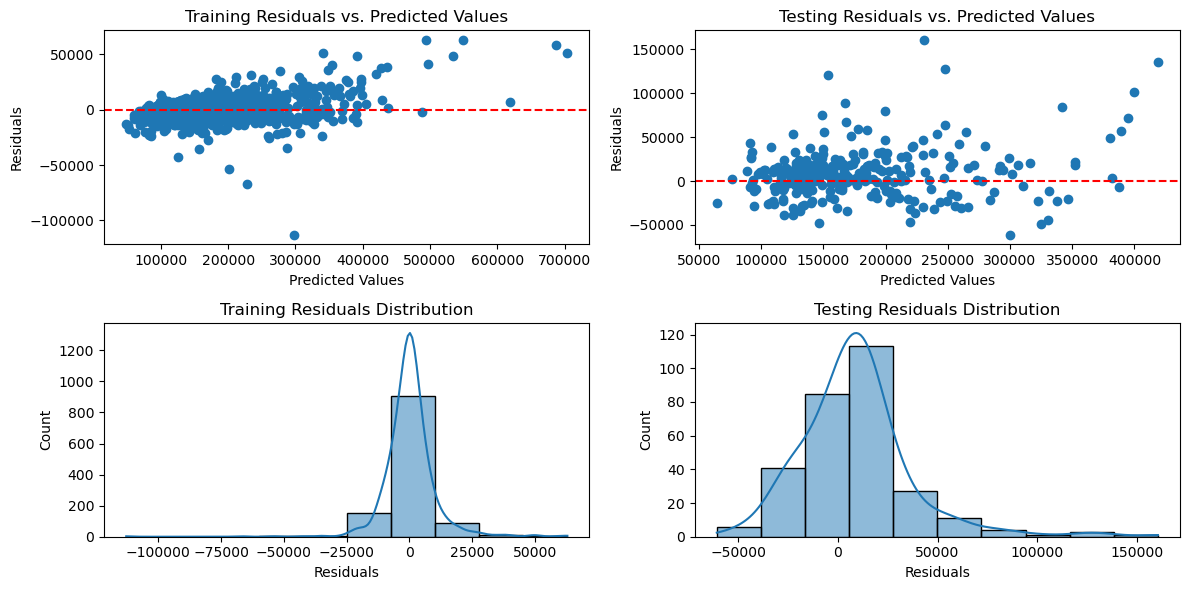

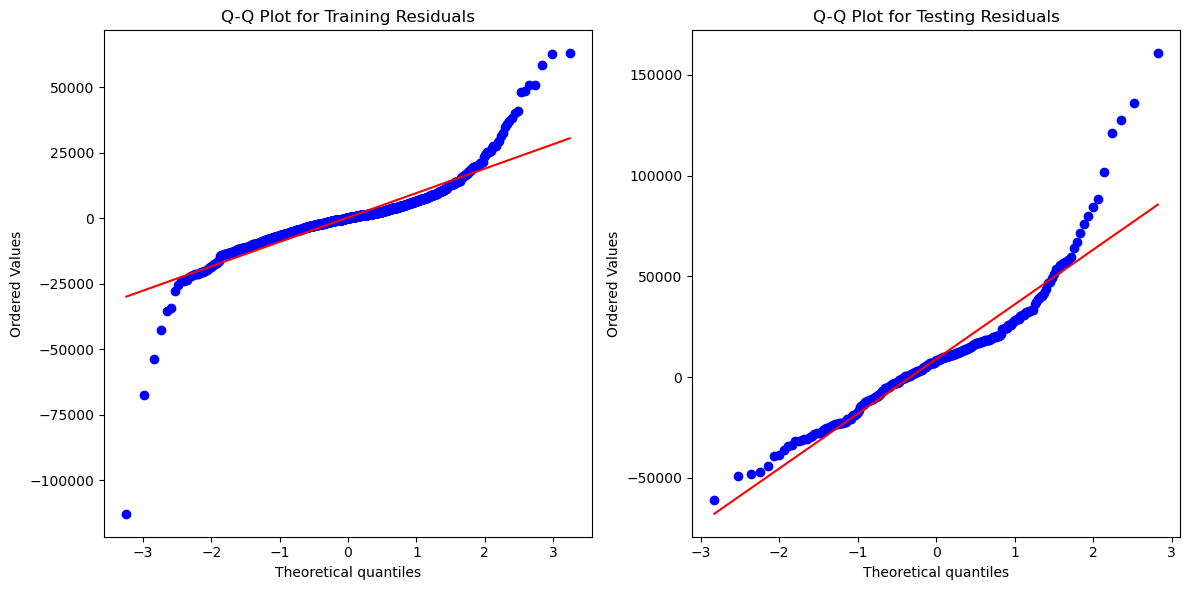

In [87]:
import seaborn as sns

# Calculate residuals
train_residuals = train_y - prediction_y
test_residuals = test_y - predicted_y

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(prediction_y, train_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Residuals vs. Predicted Values')

plt.subplot(2, 2, 2)
plt.scatter(predicted_y, test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Testing Residuals vs. Predicted Values')

# Plot residuals distribution
plt.subplot(2, 2, 3)
sns.histplot(train_residuals, kde=True, bins=10)
plt.xlabel('Residuals')
plt.title('Training Residuals Distribution')

plt.subplot(2, 2, 4)
sns.histplot(test_residuals, kde=True, bins=10)
plt.xlabel('Residuals')
plt.title('Testing Residuals Distribution')

plt.tight_layout()
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Training Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Testing Residuals')

plt.tight_layout()
plt.show()


In [88]:
from sklearn.linear_model import HuberRegressor

In [89]:
huber_model=HuberRegressor()
huber_model.fit(train_x,train_y)

mean_absolute_error(huber_model.predict(test_x),test_y)

21344.708887529196

In [90]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,predicted_y)

889138672.3557243

In [91]:
import seaborn as sns

<Axes: ylabel='SalePrice'>

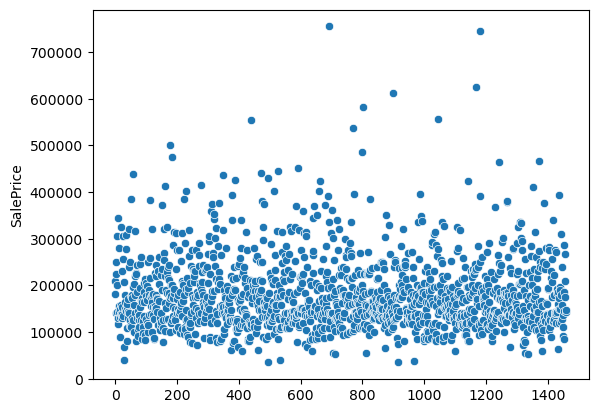

In [92]:

sns.scatterplot(df["SalePrice"])

In [93]:
new_df=df.drop(df[df.SalePrice>405000].index).copy()

In [94]:
new_features=new_df[feature_columns[:-1]].copy()
new_target=new_df["SalePrice"].copy()

In [95]:
x_train,x_test,y_train,y_test=train_test_split(new_features,new_target,train_size=0.8,random_state=42)

In [96]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [97]:
y_predict=linear_model.predict(x_test)

In [98]:
mean_absolute_error(y_test,y_predict)

18933.73809728283

In [99]:
r2_score(y_test,y_predict)

0.8537268299646387